In [1]:
import sys
from os.path import join, abspath
from glob import glob
import numpy as np
import vaex
from tqdm import tqdm
import matplotlib.pyplot as plt
from time import time
from scipy.optimize import curve_fit
from scipy.stats import norm, skewnorm

In [2]:
# import utils
root_dir = abspath(join('..'))
root_dir

'/home2/s20321005/Thesis-Project'

In [3]:
if root_dir not in sys.path:
    sys.path.append(root_dir)
sys.path

['/home2/s20321005/Thesis-Project/6_Analisis',
 '/home2/s20321005/.conda/envs/vaex/lib/python38.zip',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8/lib-dynload',
 '',
 '/home2/s20321005/.local/lib/python3.8/site-packages',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8/site-packages',
 '/home2/s20321005/Thesis-Project']

In [45]:
from utils import style, hdi, load_spectral_types

In [5]:
sp = load_spectral_types()
sp

,SpT,M_J,J-H,H-Ks,J-K
0,O9V,-3.44,-0.164,-0.071,-0.235
1,O9.5V,-3.30,-0.161,-0.069,-0.230
2,B0V,-3.17,-0.159,-0.067,-0.226
3,B0.5V,-2.80,-0.153,-0.063,-0.216
4,B1V,-2.33,-0.148,-0.059,-0.207
...,...,...,...,...,...
95,T6V,15.34,0.100,-0.030,0.070
96,T7V,15.83,0.000,0.000,0.000
97,T7.5V,16.61,0.200,-0.050,0.150
98,T8V,17.30,0.200,-0.050,0.150


In [6]:
style(name="seaborn-notebook")

In [7]:
root_data_dir = abspath(join(root_dir, "Data"))
root_data_dir

'/home2/s20321005/Thesis-Project/Data'

In [8]:
data_baryon_dir = join(root_data_dir, "Baryon")
# load baryons components
df_baryon = vaex.open(join(data_baryon_dir, "baryon.hdf5"))
rhos = df_baryon["rho"].to_numpy()  # Msun/pc^3
sigmaz = df_baryon["sigma_z"].to_numpy() # km/s

e_rhos = df_baryon["e_rho"].to_numpy()  # Msun/pc^3
e_sigmaz = df_baryon["e_sigma_z"].to_numpy() # km/s
dpi=100

In [9]:
eff_vol = glob(join(root_data_dir, 'Effective-Volume', 'no', "z*"))
eff_vol.sort()
eff_vol

['/home2/s20321005/Thesis-Project/Data/Effective-Volume/no/z_(-0.00)_(0.11).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Volume/no/z_(0.11)_(0.16).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Volume/no/z_(0.16)_(0.19).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Volume/no/z_(0.19)_(0.22).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Volume/no/z_(0.22)_(0.24).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Volume/no/z_(0.24)_(0.27).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Volume/no/z_(0.27)_(0.29).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Volume/no/z_(0.29)_(0.31).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Volume/no/z_(0.31)_(0.32).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Volume/no/z_(0.32)_(0.34).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Volume/no/z_(0.34)_(0.36).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Volume/no/z_(0.36)_(0.37).hdf5']

In [10]:
import re
c1, c2 = [], []
# get the value between () of the file name
for f in eff_vol:
    c1.append(float(re.findall(r'\((.*?)\)', f)[0]))
    c2.append(float(re.findall(r'\((.*?)\)', f)[1]))
c1 = np.array(c1)
c2 = np.array(c2)
c = 0.5*(c1+c2)
c

array([0.055, 0.135, 0.175, 0.205, 0.23 , 0.255, 0.28 , 0.3  , 0.315,
       0.33 , 0.35 , 0.365])

In [11]:
mcmc_dm_dir = join(root_data_dir, "MCMC-no", "dm", "data")
mcmc_dm_dir

'/home2/s20321005/Thesis-Project/Data/MCMC-no/dm/data'

In [12]:
files = glob(join(mcmc_dm_dir, "chain-*"))
files.sort()
files

['/home2/s20321005/Thesis-Project/Data/MCMC-no/dm/data/chain-(-0.00)_(0.11).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/dm/data/chain-(0.11)_(0.16).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/dm/data/chain-(0.16)_(0.19).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/dm/data/chain-(0.19)_(0.22).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/dm/data/chain-(0.22)_(0.24).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/dm/data/chain-(0.24)_(0.27).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/dm/data/chain-(0.27)_(0.29).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/dm/data/chain-(0.29)_(0.31).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/dm/data/chain-(0.31)_(0.32).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/dm/data/chain-(0.32)_(0.34).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/dm/data/chain-(0.34)_(0.36).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/dm/data/chain-(0.36)_(0.37).npy']

## tes

In [13]:
index = 0
df = np.load(files[index])
df.shape

(500, 340, 34)

In [14]:
rhob = df[:, :, 12:24]
rhob = rhob.reshape(-1, 12)
rhob = rhob.sum(axis=1)/1E-2
rhoDM = df[:, :, 24].reshape(-1)/1E-2
length = len(rhob)
rhob0 = np.empty((length, 12))
for i in range(12):
    rhob0[:,i] = norm.rvs(loc=rhos[i], scale=e_rhos[i], size=length)
rhob0 = rhob0.sum(axis=1)/1E-2

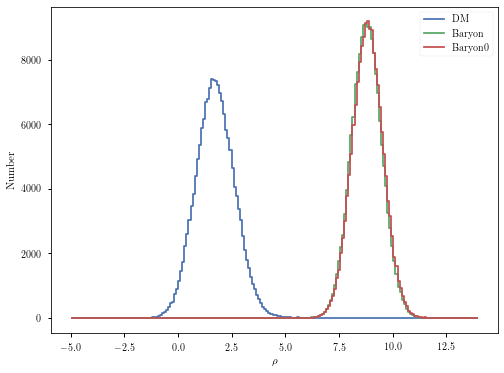

In [15]:
rho = np.linspace(-5, 14, 200)
rhoDM_num, _ = np.histogram(rhoDM, bins=rho)
rhob_num, _ = np.histogram(rhob, bins=rho)
rhob0_num, _ = np.histogram(rhob0, bins=rho)
rhomid = 0.5*(rho[1:] + rho[:-1])
# plot step
fig, ax = plt.subplots(figsize=(8, 6))
ax.step(rhomid, rhoDM_num, label='DM')
ax.step(rhomid, rhob_num, label='Baryon')
ax.step(rhomid, rhob0_num, label='Baryon0')
ax.set_xlabel(r'$\rho$')
ax.set_ylabel('Number')
ax.legend()
plt.show()

In [17]:
rhoDM_sample = np.random.choice(rhoDM, size=50_000, replace=False)
rhoDM_fit = skewnorm.fit(rhoDM_sample)
rhob_sample = np.random.choice(rhob, size=50_000, replace=False)
rhob_fit = skewnorm.fit(rhob_sample)
rhob0_sample = np.random.choice(rhob0, size=50_000, replace=False)
rhob0_fit = norm.fit(rhob0_sample)

((0.9679333228983362, 1.1987351347729192, 1.0675613478627772),
 (-0.32212833286256926, 9.021769709828355, 0.7242054750131977),
 (8.889118528448243, 0.7086532460607495))

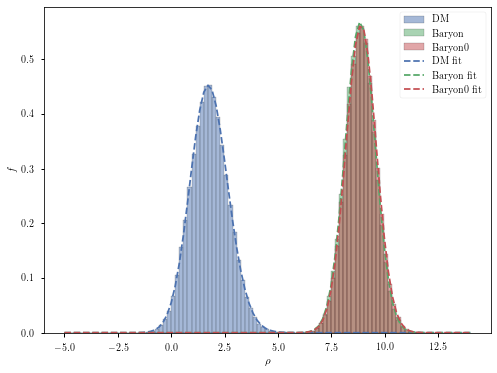

In [18]:
# plot
rho = np.linspace(-5, 14, 100)
fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(rhoDM, bins=rho, density=True, label='DM', ec='k', alpha=0.5, color='C0')
ax.hist(rhob, bins=rho, density=True, label='Baryon', ec='k', alpha=0.5,color='C1')
ax.hist(rhob0, bins=rho, density=True, label='Baryon0', ec='k', alpha=0.5, color='C2')
ax.plot(rho, skewnorm.pdf(rho, *rhoDM_fit), label='DM fit', color='C0',  ls='--')
ax.plot(rho, skewnorm.pdf(rho, *rhob_fit), label='Baryon fit', color='C1', ls='--')
ax.plot(rho, norm.pdf(rho, *rhob0_fit), label='Baryon0 fit', color='C2', ls='--')
ax.set_xlabel(r'$\rho$')
ax.set_ylabel(r'$f$')
ax.legend()
rhoDM_fit, rhob_fit, rhob0_fit

rhoDM = 1.73 +0.90/-0.85
rhob = 8.85 +0.69/-0.70
rhob0 = 8.89 +0.70/-0.70


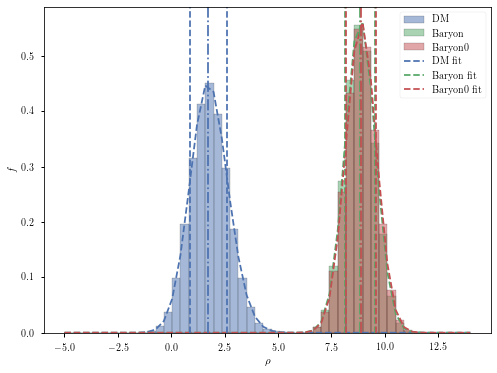

In [19]:
sigma = np.array([68, 90, 95])
alpha = 1 - sigma/100

hpd, modes = hdi(lambda x: skewnorm.pdf(x, *rhoDM_fit), -3, 7, alpha=alpha[0])
rhoDM_mode = modes[0]
rhoDM_low, rhoDM_high = hpd[0]

hpd, modes = hdi(lambda x: skewnorm.pdf(x, *rhob_fit), 5, 12.5, alpha=alpha[0])
rhob_mode = modes[0]
rhob_low, rhob_high = hpd[0]

hpd, modes = hdi(lambda x: norm.pdf(x, *rhob0_fit), 5, 12.5, alpha=alpha[0])
rhob0_mode = modes[0]
rhob0_low, rhob0_high = hpd[0]

# plot
rho = np.linspace(-5, 14, 50)
fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(rhoDM, bins=rho, density=True, label='DM', ec='k', alpha=0.5, color='C0')
ax.hist(rhob, bins=rho, density=True, label='Baryon', ec='k', alpha=0.5,color='C1')
ax.hist(rhob0, bins=rho, density=True, label='Baryon0', ec='k', alpha=0.5, color='C2')
ax.plot(rho, skewnorm.pdf(rho, *rhoDM_fit), label='DM fit', color='C0',  ls='--')
ax.plot(rho, skewnorm.pdf(rho, *rhob_fit), label='Baryon fit', color='C1', ls='--')
ax.plot(rho, norm.pdf(rho, *rhob0_fit), label='Baryon0 fit', color='C2', ls='--')
ax.axvline(rhoDM_mode, color='C0', ls='-.')
ax.axvline(rhob_mode, color='C1', ls='-.')
ax.axvline(rhob0_mode, color='C2', ls='-.')
ax.axvline(rhoDM_low, color='C0', ls='--')
ax.axvline(rhoDM_high, color='C0', ls='--')
ax.axvline(rhob_low, color='C1', ls='--')
ax.axvline(rhob_high, color='C1', ls='--')
ax.axvline(rhob0_low, color='C2', ls='--')
ax.axvline(rhob0_high, color='C2', ls='--')
ax.set_xlabel(r'$\rho$')
ax.set_ylabel(r'$f$')
ax.legend()
print(f'rhoDM = {rhoDM_mode:.02f} +{rhoDM_high-rhoDM_mode:.02f}/-{rhoDM_mode-rhoDM_low:.02f}')
print(f'rhob = {rhob_mode:.02f} +{rhob_high-rhob_mode:.02f}/-{rhob_mode-rhob_low:.02f}')
print(f'rhob0 = {rhob0_mode:.02f} +{rhob0_high-rhob0_mode:.02f}/-{rhob0_mode-rhob0_low:.02f}')

rhob0 = 8.89 +0.70/-0.70


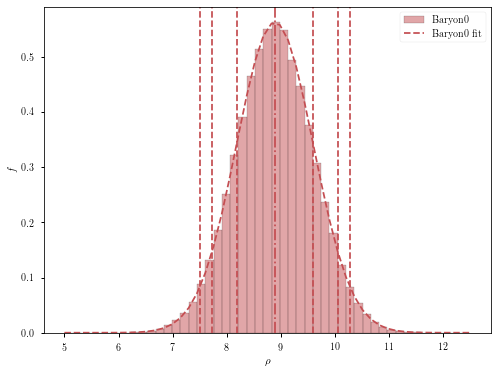

In [20]:
rhob0_low = []
rhob0_high = []
for i, alp in enumerate(alpha):
    hpd, modes = hdi(lambda x: norm.pdf(x, *rhob0_fit), low=5, high=12.5, alpha=alp)
    low, high = hpd[0]
    rhob0_low.append(low)
    rhob0_high.append(high)
# plot
rho = np.linspace(5, 12.5, 50)
fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(rhob0, bins=rho, density=True, label='Baryon0', ec='k', alpha=0.5, color='C2')
ax.plot(rho, norm.pdf(rho, *rhob0_fit), label='Baryon0 fit', color='C2', ls='--')
ax.axvline(rhob0_mode, color='C2', ls='-.')
for low, high in zip(rhob0_low, rhob0_high):
    ax.axvline(low, color='C2', ls='--')
    ax.axvline(high, color='C2', ls='--')
ax.set_xlabel(r'$\rho$')
ax.set_ylabel(r'$f$')
ax.legend()
print(f'rhob0 = {rhob0_mode:.02f} +{rhob0_high[0]-rhob0_mode:.02f}/-{rhob0_mode-rhob0_low[0]:.02f}')

In [40]:
from tqdm import tqdm

rhoDM_modes = []
rhoDM_errs = []
rhob_modes = []
rhob_errs = []
rhoDM_fits = []

for file in tqdm(files):
    df = np.load(file)
    rhob = df[:, :, 12:24]
    rhob = rhob.reshape(-1, 12)
    rhob = rhob.sum(axis=1)/1E-2
    rhoDM = df[:, :, 24].reshape(-1)/1E-2
    # print("fitting...")
    rhoDM_sample = np.random.choice(rhoDM, size=10_000, replace=False)
    rhoDM_fit = skewnorm.fit(rhoDM_sample)
    rhoDM_fits.append(rhoDM_fit)
    rhob_sample = np.random.choice(rhob, size=10_000, replace=False)
    rhob_fit = skewnorm.fit(rhob_sample)
    # print("calculating HDI...")
    rhoDM_err = []
    rhob_err = []
    rhoDM_mode = None
    rhob_mode = None
    for i, alp in enumerate(alpha):
        hpd, modes = hdi(lambda x: skewnorm.pdf(x, *rhoDM_fit), -5, 10, alpha=alp)
        rhoDM_mode = modes[0]
        low, high = hpd[0]
        rhoDM_err.append({'alpha': alp, 'low': low, 'high': high})

        hpd, modes = hdi(lambda x: skewnorm.pdf(x, *rhob_fit), 5, 15, alpha=alp)
        rhob_mode = modes[0]
        low, high = hpd[0]
        rhob_err.append({'alpha': alp, 'low': low, 'high': high})
    rhoDM_errs.append(rhoDM_err)
    rhob_errs.append(rhob_err)
    rhoDM_modes.append(rhoDM_mode)
    rhob_modes.append(rhob_mode)

100%|██████████| 12/12 [00:05<00:00,  2.09it/s]


In [41]:
rhoDM_fits

[(1.0359635362024608, 1.1675453931188495, 1.072159924918259),
 (0.9860788672874177, 1.7936503356820945, 1.4496410173373597),
 (1.2641889832686537, -0.4469483118340416, 1.4575345877753332),
 (0.564558196449048, 2.6206933377532557, 1.179347600721396),
 (0.6785151627115564, 3.9649187365431295, 1.4513098458516995),
 (-0.5224184037343562, 5.338906112417451, 1.245690224814429),
 (0.8920567854271026, 3.392673330341724, 1.3678543688759628),
 (0.46292075775950475, 1.9974645022064186, 1.275716079107454),
 (1.3190840000727566, -0.462695844214577, 2.253111851421777),
 (0.7863152487930145, 2.2386731426126456, 1.5339725253337013),
 (-0.6591446860073304, 1.9291401819280147, 1.3630087320193227),
 (0.9416076571612835, -0.07087112949930632, 1.9465002571470396)]

(-2.0, 5.0)

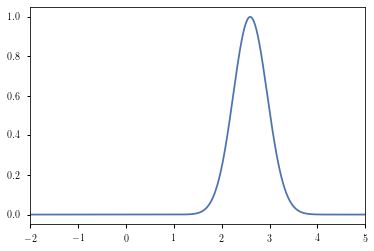

In [42]:
# multiplying the rhoDM, but it became addition in log
rho = np.linspace(-5, 14, 10000)
log_rhoDM = None
for p in rhoDM_fits:
    if log_rhoDM is None:
        log_rhoDM = skewnorm.logpdf(rho, *p)
    else:
        log_rhoDM += skewnorm.logpdf(rho, *p)
# turn into rhoDM
rhoDM_com = np.exp(log_rhoDM)
# normalize with max value
rhoDM_com /= rhoDM_com.max()
# plot
fig, ax = plt.subplots()
ax.plot(rho, rhoDM_com, label='rhoDM')
ax.set_xlim(-2,5)

In [43]:
def skewpdf(x, *args):
    A, other = args[0], args[1:]
    return A*skewnorm.pdf(x, *other)

rhoDM_com_fit, _ = curve_fit(skewpdf, rho, rhoDM_com, p0=[1, 1.0, 2.0, 1])
rhoDM_com_fit

array([0.89040629, 0.50055999, 2.46306781, 0.38050561])

(0.0, 5.0)

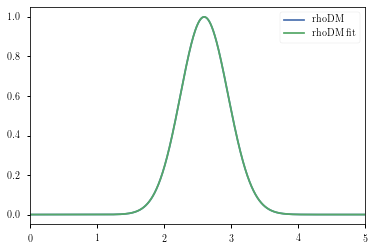

In [44]:
plt.plot(rho, rhoDM_com, label='rhoDM')
plt.plot(rho, skewpdf(rho, *rhoDM_com_fit), label='rhoDM fit')
plt.legend()
plt.xlim(0,5)

In [46]:
rhoDM_com_err = []
rhoDM_com_mode = None
for i, alp in enumerate(alpha):
    hpd, modes = hdi(lambda x: skewpdf(x, *rhoDM_com_fit), low=0.5, high=3, alpha=alp)
    low, high = hpd[0]
    rhoDM_com_err.append({'sigma':sigma, 'low': low, 'high': high})
    rhoDM_com_mode = modes[0]
rhoDM_com_mode, rhoDM_com_err

(2.59,
 [{'sigma': array([68, 90, 95]), 'low': 2.3, 'high': 2.89},
  {'sigma': array([68, 90, 95]), 'low': 2.12, 'high': 3.0},
  {'sigma': array([68, 90, 95]), 'low': 1.99, 'high': 3.0}])

In [29]:
A9 = sp[sp['SpT'] == 'A9V']['J-K'].values[0]
F0 = sp[sp['SpT'] == 'F0V']['J-K'].values[0]
b1 = (A9+F0)/2

F9 = sp[sp['SpT'] == 'F9V']['J-K'].values[0]
G0 = sp[sp['SpT'] == 'G0V']['J-K'].values[0]
b2 = (F9+G0)/2
b1, b2

(0.1355, 0.314)

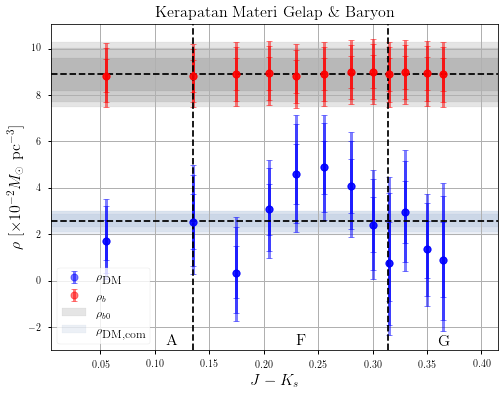

2.59

In [47]:
cs = np.linspace(c.min()-0.05, c.max()+0.05, 100)

fig, ax = plt.subplots(figsize=(8, 6))
ax.axhline(y=rhob0_mode, color='black', linestyle='--')
for i in range(3):
    low = np.array([err[i]['low'] for err in rhoDM_errs])
    high = np.array([err[i]['high'] for err in rhoDM_errs])
    dm_ax = ax.errorbar(c, rhoDM_modes, yerr=[rhoDM_modes-low, high-rhoDM_modes], fmt='o', color='blue', capsize=3, alpha=0.5, elinewidth=3, markeredgewidth=1)
    low = np.array([err[i]['low'] for err in rhob_errs])
    high = np.array([err[i]['high'] for err in rhob_errs])
    rhob_ax = ax.errorbar(c, rhob_modes, yerr=[rhob_modes-low, high-rhob_modes], fmt='o', color='red', capsize=3, alpha=0.5, elinewidth=3, markeredgewidth=1)
    rhob0_ax = ax.fill_between(cs, rhob0_low[i], rhob0_high[i], color='black', alpha=0.1)
    rhoDM_com_ax = ax.fill_between(cs, rhoDM_com_err[i]['low'], rhoDM_com_err[i]['high'], color='C0', alpha=0.1)
    if i == 2:
        ax.legend([dm_ax, rhob_ax, rhob0_ax, rhoDM_com_ax], 
                  [r'$\rho_{\textup{DM}}$', r'$\rho_{b}$', r'$\rho_{b0}$', r'$\rho_{\textup{DM,com}}$'],
                  loc='best', fontsize=12)
# real value
ax.axhline(y=rhoDM_com_mode, color='black', linestyle='--')
ax.axvline(x=b1, color='black', linestyle='--')
ax.axvline(x=b2, color='black', linestyle='--')
ax.text(0.11, -2.8, r'$\textup{A}$', fontsize=16)
ax.text(0.23, -2.8, r'$\textup{F}$', fontsize=16)
ax.text(0.36, -2.8, r'$\textup{G}$', fontsize=16)
ax.set_xlabel(r'$J-K_s$', fontsize=16)
ax.set_ylabel(r'$\rho$ [$\times 10^{-2}M_{\odot}\ $pc$^{-3}$]', fontsize=16)
ax.set_xlim(cs.min(), cs.max())
ax.set_title("Kerapatan Materi Gelap \& Baryon", fontsize=16)
ax.grid()
fig.savefig(join('img', 'rhoDM-dm.pdf'), dpi=70)
plt.show()
rhoDM_com_mode